In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 


In [2]:
auto_bus = pd.read_csv("Automotive business")
auto_rv = pd.read_csv("Automotive review")

In [3]:
auto_bus

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,9brW55Vzyi3ItboHWfoepg,"7525 Century Ave\nMiddleton, WI 53562","{'Monday': {'close': '20:00', 'open': '08:30'}...",True,"['Auto Repair', 'Automotive', 'Auto Parts & Su...",Middleton,5,Zimbrick Acura,[],-89.509978,WI,2.5,43.111534,{},business
1,LOp0ciu7XhZwTqZUWG8qCw,"2229 Eagle Dr\nMiddleton, WI 53562","{'Tuesday': {'close': '19:00', 'open': '07:00'...",True,"['Tires', 'Automotive', 'Auto Repair', 'Oil Ch...",Middleton,3,Bennett's Auto Repair LLC,[],-89.527745,WI,5.0,43.099418,{},business
2,O16EckCLtNoA49hewGht_w,"6516 University Ave\nMiddleton, WI 53562","{'Friday': {'close': '12:30', 'open': '07:30'}...",True,"['Tires', 'Automotive', 'Auto Repair']",Middleton,3,Dunn's Import Inc,[],-89.493464,WI,5.0,43.095357,{},business
3,qNBvH111qgJgLYUScbph7g,"3206 Parmenter St\nMiddleton, WI 53562",{},True,"['Car Wash', 'Automotive']",Middleton,3,Magic Wash Inc,[],-89.510121,WI,4.5,43.109218,{},business
4,uyp8kpTXKfKXvAB8HdJSAA,"7505 Century Ave\nMiddleton, WI 53562","{'Monday': {'close': '20:00', 'open': '08:30'}...",True,"['Auto Repair', 'Automotive', 'Auto Parts & Su...",Middleton,10,Zimbrick Volkswagen,[],-89.510465,WI,3.5,43.110915,{},business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,e-1HA74HRThULkQIuz1t3A,"5880 W Chandler Blvd\nChandler, AZ 85226",{},True,"['Car Wash', 'Automotive']",Chandler,4,Surfer Express Car Wash,[],-111.944361,AZ,2.5,33.305800,{},business
2198,TFdUHR5EnAPR_vgZaZo3wA,"9211 E Via De Ventura\nScottsdale, AZ 85258","{'Monday': {'close': '19:00', 'open': '07:00'}...",True,"['Car Wash', 'Automotive']",Scottsdale,4,Clean Freak Car Wash,[],-111.881648,AZ,5.0,33.552666,{},business
2199,-A-Dy_u25DTds1bdERFu5w,"5115 Dean Martin Dr\nSte C301\nLas Vegas, NV 8...","{'Monday': {'close': '18:00', 'open': '09:00'}...",True,"['Automotive', 'Car Dealers']",Las Vegas,5,BMW Only,[],-115.181935,NV,5.0,36.096816,{},business
2200,2yWjRrN3vzAoESuYkMI6Wg,"6620 E Mckellips Rd\nSte 103\nMesa, AZ 85215","{'Monday': {'close': '17:00', 'open': '08:00'}...",True,"['Automotive', 'Windshield Installation & Repa...",Mesa,9,Smartfilm,[],-111.685250,AZ,5.0,33.452274,{},business


In [4]:
category_auto = ['Auto Customization', 'Auto Detailing', 'Auto Glass Services', 'Auto Loan Providers',
        'Auto Parts & Supplies', 'Auto Repair', 'Boat Dealers', 'Boat Repair', 'Car Dealers',
        'Car Rental', 'Car Share Services', 'Car Stereo Installation', 'Car Wash',
        'Motorcycle Dealers', 'Motorcycle Gear', 'Motorcycle Rental', 'Motorcycle Repair',
        'RV Dealers', 'RV Parks', 'RV Rental', 'Gas & Service Stations', 'Parking', 'Tires',
        'Towing', 'Truck Rental', 'Windshield Installation & Repair']

In [5]:
true = set()
for i in range(len(auto_bus)):
    for j in auto_bus.loc[i,"categories"]:
        if j in category_auto:
            true.add(i)

In [6]:
len(true)

0

In [7]:
import copy

In [8]:
auto = copy.deepcopy(auto_bus)

In [9]:
for i in range(len(auto_bus)):
    for j in auto_bus.loc[i , "categories"]:
        print(j)
    break

[
'
A
u
t
o
 
R
e
p
a
i
r
'
,
 
'
A
u
t
o
m
o
t
i
v
e
'
,
 
'
A
u
t
o
 
P
a
r
t
s
 
&
 
S
u
p
p
l
i
e
s
'
,
 
'
C
a
r
 
D
e
a
l
e
r
s
'
]


In [10]:
import ast

In [11]:
auto_bus['categories'] = auto_bus['categories'].apply(ast.literal_eval)

### Step 4: Data Pre-processing

We are going to use a technique called colaborative filtering to generate recommendations for users. This technique is based on the premise that similar people like similar things. 

The first step is to transform our data into a user-item matrix, also known as a "utility" matrix. In this matrix, rows represent users and columns represent movies. The beauty of collaborative filtering is that it doesn't require any information about the users or the movies user to generate recommendations.


The `create_X()` function outputs a sparse matrix $X$ with four mapper dictionaries:

- **user_mapper**: maps user id to user index
- **movie_mapper**: maps movie id to movie index
- **user_inv_mapper**: maps user index to user id
- **movie_inv_mapper**: maps movie index to movie id

We need these dictionaries because they map which row/column of the utility matrix corresponds to which user/movie id.

Our $X$ (user-item) matrix is a [scipy.sparse.csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) which stores the data sparsely.

In [12]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from starss dataframe. --> stars data only ==> collaborative filtering
    
    Args:
        df: pandas dataframe containing 3 columns (user_id, business_id, stars)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        business_mapper: dict that maps business id's to business indices
        business_inv_mapper: dict that maps business indices to business id's
    """
    M = df['user_id'].nunique()
    N = df['business_id'].nunique()

    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(M))))
    business_mapper = dict(zip(np.unique(df["business_id"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["user_id"])))
    business_inv_mapper = dict(zip(list(range(N)), np.unique(df["business_id"])))
    
    user_index = [user_mapper[i] for i in df['user_id']]
    item_index = [business_mapper[i] for i in df['business_id']]

    X = csr_matrix((df["stars"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, business_mapper, user_inv_mapper, business_inv_mapper



In [13]:
X, user_mapper, business_mapper, user_inv_mapper, business_inv_mapper = create_X(auto_rv)

In [14]:
X.shape

(16162, 2199)

##### The Utility matrix contains [16162 User] and [2199 business]

In [15]:
auto_rv.columns

Index(['votes', 'user_id', 'review_id', 'stars', 'date', 'text', 'type',
       'business_id'],
      dtype='object')

In [16]:
business_mapper

{'-2qwFaJDeZOfsqrv7qEFlw': 0,
 '-3JXOT-i2gDbASLgDeOSwQ': 1,
 '-5ZUwX9OPKwtRnPcCw6EpA': 2,
 '-5bLhMLNGbIVyoPOVl0yLg': 3,
 '-6ASzuRXDQCpPDsJT_oKtQ': 4,
 '-6yJHzBVChf6MfMMVYeOiQ': 5,
 '-86ffSXtKifg7T14bMKLOQ': 6,
 '-8s2NtyZRbdaHWB95gc_7Q': 7,
 '-A-Dy_u25DTds1bdERFu5w': 8,
 '-BQHw828VNrNZ7LtFnFJCA': 9,
 '-CzGslHoF5m36iSFMcw_Fw': 10,
 '-F47dphMenjwDlBBMrjt0Q': 11,
 '-J-kQpDGIkX_1XHfi0HG2g': 12,
 '-KR8uHx8mq-ogiFX7TITIw': 13,
 '-KaJVVGbtkf7dGue3_hQ3g': 14,
 '-OVQaFk91T5twcGjy75NNA': 15,
 '-R7hAYD7oCuEfcZ85u2Zrg': 16,
 '-TXdYCyQTK2sY5eTbfFCGg': 17,
 '-X128ZdT1oEka2AYsFN_KA': 18,
 '-Xt7W-mrOxl5MOd1czahCQ': 19,
 '-YOz_DDaW5RVNr_KQUkPGg': 20,
 '-_Ex8L_ZN-BwEtKFtaXs9A': 21,
 '-bLEz4K0e1IHYdVbbiEUHw': 22,
 '-bLYfQ30phOC_znU8vyCpg': 23,
 '-diptioiATxYRR3NPX5JZA': 24,
 '-fMTngmHp9th6dpA_bvM5g': 25,
 '-mQ8to8Y4MSMS5tIjgsV3g': 26,
 '-tJda8ueJhOflsUnkyktwA': 27,
 '00FGafv0TKfmH_QhVxh4FQ': 28,
 '05j-G9yM1HN9Skc8d6lUSw': 29,
 '05sceQms8VxOiTKt8gr2gQ': 30,
 '08xBCulmeQQASYs8GJj0jg': 31,
 '0ABXNVBv108YNOOS

### Evaluating sparsity

Here, we calculate sparsity by dividing the number of stored elements by total number of elements. The number of stored (non-empty) elements in our matrix ([nnz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.nnz.html)) is equivalent to the number of ratings in our dataset.

In [17]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.06%


# finding ratings stats

In [18]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

16162

In [19]:
print(f"Most active user rated {n_ratings_per_user.max()} businesss.")
print(f"Least active user rated {n_ratings_per_user.min()} businesss.")

Most active user rated 61 businesss.
Least active user rated 1 businesss.


In [20]:
n_ratings_per_business = X.getnnz(axis=0)
len(n_ratings_per_business)

2199

In [21]:
print(f"Most rated business has {n_ratings_per_business.max()} ratings.")
print(f"Least rated business has {n_ratings_per_business.min()} ratings.")

Most rated business has 260 ratings.
Least rated business has 1 ratings.


/tmp/ipykernel_4801/1532231277.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_user, shade=True)
/home/darsh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_4801/1532231277.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_business, shade=True)
/home/darsh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_contex

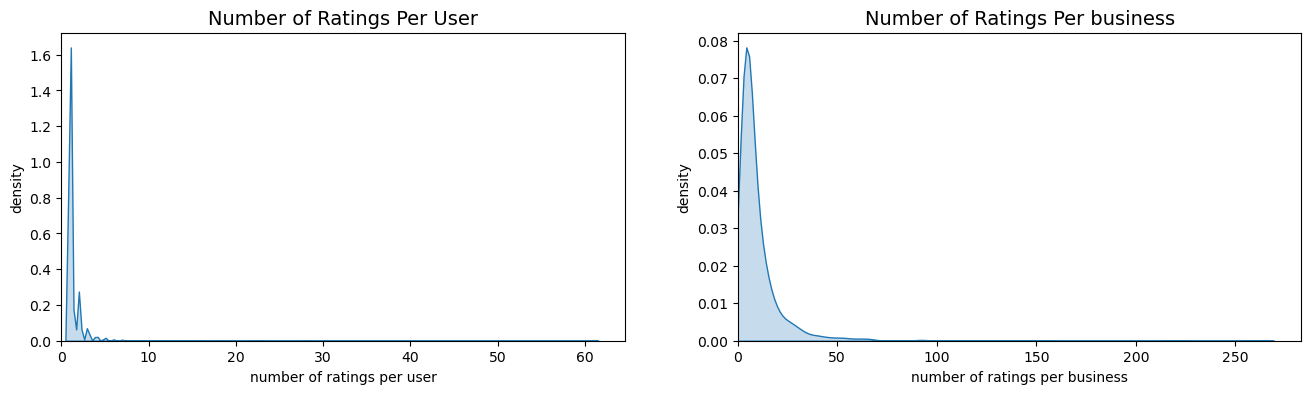

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_business, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per business", fontsize=14)
plt.xlabel("number of ratings per business")
plt.ylabel("density")
plt.show()

### Step 5: Item-item Recommendations with k-Nearest Neighbors

We are going to find the $k$ movies that have the most similar user engagement vectors for movie $i$.

In [23]:
from sklearn.neighbors import NearestNeighbors

def find_similar_business(business_id, X, business_mapper, business_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given business id.
    
    Args:
        business_id: id of the business of interest
        X: user-item utility matrix
        k: number of similar businesss to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar business ID's
    """
    X = X.T
    neighbour_ids = []
    
    business_ind = business_mapper[business_id]
    business_vec = X[business_ind]
    if isinstance(business_vec, (np.ndarray)):
        business_vec = business_vec.reshape(1,-1)
    # use k+1 since kNN output includes the businessId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(business_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(business_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

`find_similar_movies()` takes in a `movieId` and `X` matrix, and outputs a list of $k$ movies that are similar to the `movieId` of interest.

Let's see how it works in action. We will first create another mapper that maps movieId to title so that our results are interpretable.

In [24]:
similar_businesss = find_similar_business("-6yJHzBVChf6MfMMVYeOiQ", X, business_mapper, business_inv_mapper, k=10)
similar_businesss

['PqyluAF73YCF9nxnUs4emg',
 'Jy2giC14hE6lP-ooLJiyLA',
 'fGkRQjtFg-ih1e6z_PzlNQ',
 'MfcXonXMQZQuROvH4Ojceg',
 'W_TjN1pbEfLE90uEOdNVCQ',
 'mFqpvUsEveJ1L5XPbcxaGg',
 'nNR_vpW_XeTn3dujChxFww',
 'hZjVCuqFb5PyJmhSv6yexQ',
 'tsZ9UarPegS07_C0_7ZwUA']

`find_similar_movies()` returns a list of `movieId`'s that are most similar to your movie of interest. Let's convert these id's to titles so that we can interpret our results. To make things easier, we will create a dictionary that maps `movieId` to `title`.

In [25]:
business_titles = dict(zip(auto_bus['business_id'], auto_bus['name']))

business_id = "-6yJHzBVChf6MfMMVYeOiQ"

similar_business = find_similar_business(business_id, X, business_mapper, business_inv_mapper, metric='cosine', k=10)
business_title = business_titles[business_id]

print(f"Because you searched {business_title}:")
for i in similar_business:
    print(business_titles[i])

Because you searched Classic Car Spa:
Imm Auto Service
Brake Masters
Quality Bumper Co
Unique Car Audio
Discount Tire® Store - Mesa, AZ
Discount Tire- Tempe
Meineke Car Care Center
Rory's Airpark AutoTEK
Danny's Family Car Wash


- The results above show the 10 businesss that are most similar to Car Spa. 
- Note that these recommendations are based solely on user-item ratings. 
- business features such as categories are not used in this approach.

You can also play around with the kNN distance metric and see what results you would get if you use "manhattan" or "euclidean" instead of "cosine".

In [26]:
business_id = "-6yJHzBVChf6MfMMVYeOiQ"

similar_business = find_similar_business(business_id, X, business_mapper, business_inv_mapper, metric='euclidean', k=10)
business_title = business_titles[business_id]

print(f"Because you searched {business_title}:")
for i in similar_business:
    print(business_titles[i])

Because you searched Classic Car Spa:
Imm Auto Service
Brake Masters
Budget Rent A Car
Chapman Mesa Used Cars
U-Haul
Scooter Stop
University Sinclair
Dream Car Rentals
Planet Super Saver


In [27]:
drop_columns = auto_bus.columns

### Step 6: Handling the cold-start problem

Collaborative filtering relies solely on user-item interactions within the utility matrix. The issue with this approach is that brand new users or items with no iteractions get excluded from the recommendation system. This is called the **cold start problem**. Content-based filtering is a way to handle this problem by generating recommendations based on user and item features.

First, we need to convert the `genres` column into binary features. Each genre will have its own column in the dataframe, and will be populated with 0 or 1.

In [28]:
n_business = auto_bus['business_id'].nunique()
print(f"There are {n_business} unique business in our business dataset.")

There are 2202 unique business in our business dataset.


In [29]:
categories = set()
for i in range(len(auto_bus)):
    for j in auto_bus.loc[i,"categories"]:
        categories.add(j)

for g in categories:
    auto_bus[g] = auto_bus.categories.transform(lambda x: int(g in x))
    
business_categories = auto_bus.drop(columns= list(drop_columns)) # we made each row represent a movie

/tmp/ipykernel_4801/2220287399.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  auto_bus[g] = auto_bus.categories.transform(lambda x: int(g in x))
/tmp/ipykernel_4801/2220287399.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  auto_bus[g] = auto_bus.categories.transform(lambda x: int(g in x))


In [30]:
business_categories

,Windows Installation,Convenience Stores,Auto Loan Providers,IT Services & Computer Repair,Airport Shuttles,Wheel & Rim Repair,Home Services,RV Dealers,Local Flavor,Glass & Mirrors,...,Auto Parts & Supplies,Taxis,Gas & Service Stations,Carpet Cleaning,Motorcycle Rental,Motorcycle Gear,Security Systems,Professional Services,Antiques,Auto Glass Services
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2200,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [31]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(business_categories, business_categories)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (2202, 2202)


As expected, after passing the `business_categories` dataframe into the cosine_similarity() function, we get a cosine similarity matrix of shape $(n_{\text{BUSINESS}}, n_{\text{BUSINESS}})$.

This matrix is populated with values between 0 and 1 which represent the degree of similarity between business along the x and y axes.

### Creating a business finder function
Let's say we want to get recommendations for businesses that are similar to Jumanji. To get results from our recommender, we need to know the exact title of a business in our dataset.

In our dataset, Jumanji is actually listed as 'Jumanji (1995)'. If we misspell Jumanji or forget to include its year of release, our recommender won't be able to identify which business we're interested in.

To make our recommender more user-friendly, we can use a Python package called [fuzzywuzzy](https://pypi.org/project/fuzzywuzzy/) which will find the most similar title to a string that you pass in. Let's create a function called `business_finder()` which take advantage of fuzzywuzzy's string matching algorithm to get the most similar title to a user-inputted string.

In [32]:
from fuzzywuzzy import process

def business_finder(name):
    all_names = auto_bus['name'].tolist()
    closest_match = process.extractOne(name,all_names)
    return closest_match[0]

/home/darsh/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Let's test this out with our car spa example. 

In [33]:
name = business_finder('car spa')
name

'Classic Car Spa'

To get relevant recommendations for `car spa`, we need to find its index in the cosine simialrity matrix. To identify which row we should be looking at, we can create a business index mapper which maps a business title to the index that it represents in our matrix.

Let's create a business index dictionary called `business_idx` where the keys are business titles and values are business indices:

In [34]:
business_idx = dict(zip(auto_bus['name'], list(auto_bus.index)))
idx = business_idx[name]
print(f"business index for Classic Car Spa: {idx}")

business index for Classic Car Spa: 1392


In [35]:
auto_bus.loc[1392,"name"] # we are right

'Classic Car Spa'

Using this handy `business_idx` dictionary, we know that Classic Car Spa is represented by index 1 in our matrix. Let's get the top 10 most similar businesss to Classic Car Spa.

In [36]:
n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_businesses = [i[0] for i in sim_scores]

`similar_businesses` is an array of indices that represents Jumanji's top 10 recommendations. We can get the corresponding mbusiness titles by either creating an inverse mbusiness_idx mapper or using iloc on the title column of the businesses dataframe.

In [37]:
print(f"Because you searched {name}:")
auto_bus['name'].iloc[similar_businesses]

Because you searched Classic Car Spa:


7                      Mermaid Car Wash
22                     Octopus Car Wash
24             Los Olivos Hand Car Wash
32                 World Class Car Wash
56     Danny's Family Carousel Car Wash
70                     Arcadia Car Wash
71                     Simoniz Car Wash
110               Silver Touch Car Wash
114                 Weiss Guys Car Wash
148     Foothills Full Service Car Wash
Name: name, dtype: object

We can test our recommender further with other business titles. For your convenience, let's package the steps into a single function which takes in the business title of interest and number of recommendations.

In [46]:
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = business_finder(title_string)
    idx = business_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_businesses = [i[0] for i in sim_scores]
    print(f"Because you searched {title}:")
    print(auto_bus['name'].iloc[similar_businesses])

In [50]:
get_content_based_recommendations('Bennett', 5)

Because you searched Bennett's Auto Repair LLC:
10    Firestone Complete Auto Care
15                      Tires Plus
23           Virginia Auto Service
68               Sears Auto Center
72    Firestone Complete Auto Care
Name: name, dtype: object


In [48]:
auto_bus.loc[:,"name"]

0                  Zimbrick Acura
1       Bennett's Auto Repair LLC
2               Dunn's Import Inc
3                  Magic Wash Inc
4             Zimbrick Volkswagen
                  ...            
2197      Surfer Express Car Wash
2198         Clean Freak Car Wash
2199                     BMW Only
2200                    Smartfilm
2201                         Lyft
Name: name, Length: 2202, dtype: object